In [1]:
import numpy as np
# data = np.loadtxt('../support/zipcombo.dat')
data = np.loadtxt('../support/dtrain123.dat')

In [2]:
data.shape

(329, 257)

In [3]:
def split_80_20(data, seed) -> (np.ndarray, np.ndarray):
    """
    Splits 80% train 20% test

    :param data: sequence
    :return: train_data, test_data: np.ndarray, np.ndarray
    """
    np.random.seed(seed)

    n = data.shape[0]
    shuffle = np.random.permutation(data)
    return shuffle[:int(n*0.8)], shuffle[int(n*0.8):]

In [4]:
def split_X_y(data):
    """
    Splits the data into datapoints and labels, X_train matrix and y_train;
    :param data: np.ndarray
    :return: X_train, y_train: np.ndarray, np.adarray
    """

    return data[:, 1:], data[:, 0]


In [5]:
X_train, y_train = split_X_y(data)

In [6]:
import matplotlib.pyplot as plt

In [7]:
def display_digit(grayscale):
    plt.imshow(np.reshape(grayscale, (16, 16)), cmap='gray')

In [8]:
# testing data cleaning
y_train[100]

1.0

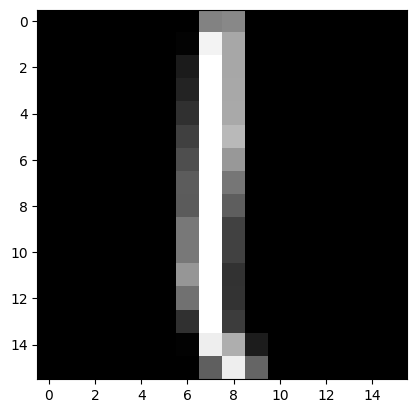

In [9]:
display_digit(X_train[100])

In [10]:
from functools import partial
from typing import Callable, Iterable

In [11]:
def polynomial_kernel(x_i: np.ndarray, x_t: np.ndarray, d: int):
    return np.inner(x_i, x_t) ** d

In [12]:
def gaussian_kernel(x_i: np.ndarray, x_j: np.ndarray, sigma=1):
    if x_i.shape[0] != x_j.shape[0]:
        raise Exception("Cannot apply kernel to vectors of different dimensions: x_i has shape {s1}, x_j has shape {s2}"
                        .format(s1=x_i.shape, s2=x_j.shape))
    diff = x_i - x_j
    return np.exp(-1 * np.inner(diff, diff) / (2 * sigma**2))

In [32]:
class KernelPerceptron:
    def __init__(self, kernel: Callable[[np.ndarray, np.ndarray], float]):
        self.kernel = kernel


    def _get_kernel_matrix(self, X_train):
        K = np.zeros((X_train.shape[0], X_train.shape[0]))

        for i in range(0, X_train.shape[0]):
            for j in range(i, X_train.shape[0]):
                K[i, j] = K[j, i] = self.kernel(X_train[i], X_train[j])

        return K


    def fit(self, X_train: np.ndarray, y_train: np.ndarray, n_epochs: int) -> np.ndarray:
        """
        Prediction function that populates the alpha parameter, 1 data point at a time;
        :param X_train: training data points
        :param y_train: training corresponding labels
        :param n_epochs: number of times to pass through the data. Alpha contains the learning parameters that get inherited from one epoch to the other
        :return: y_preds: the predictions enhanced after N epochs

        """

        y_preds = np.zeros(X_train.shape[0])
        self.X_train = X_train
        self.alpha = np.zeros(X_train.shape[0])

        # Compute kernel matrix which stays constant throught the algorithm and all epochs
        self.K = self._get_kernel_matrix(X_train)

        for epoch in range(0, n_epochs):
            for t in range(1, X_train.shape[0]):
                y_pred = np.sign(np.inner(self.K[t, :t], self.alpha[:t]))
                y_preds[t-1] = y_pred
                if y_pred == y_train[t-1]:
                    self.alpha[t-1] = 0
                else:
                    self.alpha[t-1] = y_train[t-1]
        return y_preds


    def predict(self, X: np.ndarray) -> np.ndarray:
        predictions = []
        for x_test in X:
            sum = 0
            for t in self.X_train.shape[0]:
                sum += self.alpha[t] * self.kernel(self.X_train[t], x_test)
            predictions.append(np.sign(sum))
        return np.array(predictions)


In [14]:
# test the kernel matrix
kp_test = KernelPerceptron(kernel=partial(polynomial_kernel, d=3))
kernel_matrix = kp_test._get_kernel_matrix(X_train)
polynomial_kernel(X_train[0], X_train[0], d=3) == kernel_matrix[0][0]

True

In [27]:
kp = KernelPerceptron(kernel=partial(polynomial_kernel, d=3))

y_preds = kp.fit(X_train, y_train, 3)
# y_outsample = kp.predict(X_test) # all predictions of test sample in y_outsample

KeyboardInterrupt: 

In [21]:
def get_mistakes(y_train, y_preds):
    # or calculating by checking which alpha values are different than 0? alpha is 0 when the prediction matches
    diffs = y_train-y_preds
    mistakes = 0
    for diff in diffs:
        if diff!=0:
            mistakes+=1
    return mistakes

In [34]:
get_mistakes(y_train, y_preds)

210

In [35]:
mist=0
for val in kp.alpha:
    if val!=0:
      mist+=1

In [36]:
# why is it different than get_mistakes? maybe is because alpha is 0?
mist

209

### Part 1

#### Basic results:
- for $d=1,...,7$
- perform 20 runs
- each run randomly split $zipcombo.dat$ in 80% train and 20% test

In [8]:
seeds = np.random.randint(0, 100, 20)

mse_train = []
std_train = []

mse_test = []
std_test = []

for d in range(1, 7):
    for run in range(20):
        # different seed for each run
        train, test = split_80_20(lines, seeds[run])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
